<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 10
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion de los $ejercicios$ $1$ y $2$ de la $TS10$. En este caso nos encontramos con la $sintesis$ de $circuitos$ a partir de la funcion inmitancia dada, sea una $impedancia$ o $admitancia$. Esto se realiza mediante los metodos de $foster$ y $cauer$. Ademas estaran las $resoluciones$ de cada ejercicio y ademas el codigo de verificacion.

<img src="./Enunciado_.PNG" align="middle" width="1000" /> 

## Resolucion

### Resolucion ejercicio 1

In [6]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ1_.pdf", width=900, height=1000)

### Resolucion ejercicio 2

In [5]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ2.pdf", width=900, height=900)

## Ejercicio 1)

In [10]:
import sympy as sp
from pytc2.remociones import remover_valor, remover_polo_sigma
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion, Drawing

# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2+6*s+8)/(s**2+4*s+3)

# Halle los valores de los componentes de la topología resultante.

# remoción parcial para que el siguiente tanque R1-C1 resuenen a 6 r/s

# Consignas del ejercicio: resonancias de dos tanques RC
sigma1 = 6
sigma2 = sp.Rational('7/2')

# La topología circuital guía las remociones:
    
Z2, Ra = remover_valor(ZZ, sigma_zero = sigma1)

Y4, Y3, R1, C1 = remover_polo_sigma(1/Z2, sigma1, isImpedance = False)

Z6, Rb = remover_valor(1/Y4, sigma_zero = sigma2)

Y8, k2, R2, C2 = remover_polo_sigma(1/Z6, sigma2, isImpedance = False)

Rc = 1/Y8

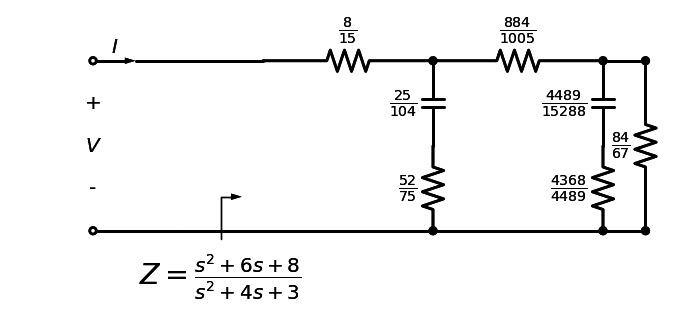

In [11]:
# Dibujamos la red resultante:

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Ra)

d = dibujar_tanque_RC_derivacion(d, R1, C1)
    
d = dibujar_elemento_serie(d, Resistor, Rb)

d = dibujar_tanque_RC_derivacion(d, R2, C2)
                        
d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, Rc)

display(d)

## Ejercicio 2)

In [2]:
import sympy as sp
import numpy as np

from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor, dibujar_elemento_derivacion, Drawing
from pytc2.remociones import remover_polo_infinito

# Resolución simbólica

s = sp.symbols('s ', complex=True)

ZZ = (s**2+s+1)/(s**2+2*s+5)/(s+1)

# remoción total en infinito de 1/ZZ

Y2, Yc1 = remover_polo_infinito(1/ZZ)

# Yc1 es la admitancia removida
# extraigo C1
C1 = Yc1/s

Ginf = sp.limit(Y2, s, sp.oo)
G0 = sp.limit(Y2, s, 0)

# remuevo la menor admitancia
R1 = 1/np.min((Ginf, G0))
Y4 = sp.factor(sp.simplify(sp.expand(Y2 - 1/R1)))

Z6, Zl1 = remover_polo_infinito(1/Y4)

# Zl1  es la impedancia removida
# extraigo L1
L1 = Zl1/s

# remuevo la menor resistencia
Rinf = sp.limit(Z6, s, sp.oo)
R0 = sp.limit(Z6, s, 0)
R2 = np.min((Rinf, R0))
Z8 = sp.factor(sp.simplify(sp.expand(Z6 - R2)))

# extraigo C2
C2 = sp.limit(1/s/Z8, s, sp.oo)

Y10, Yc2 = remover_polo_infinito(1/Z8)
# Yc1 es la admitancia removida
# extraigo C1
C2 = Yc2/s

R3 = 1/Y10

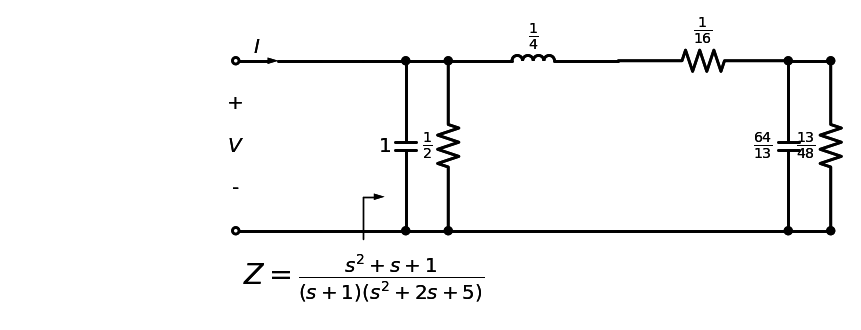

In [3]:
# Dibujamos la red resultante:

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R1)
    
d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_elemento_derivacion(d, Capacitor, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R3)

display(d)

Los valores de las $resoluciones$ verifican con lo hayado en los $codigos$.